In [30]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [53]:
import os
os.chdir('P:\SAMPLE DATA')

In [54]:
#Read the csv file
df=pd.read_csv('weatherdata.csv')
df.head() #7 columns, including the Date. 

,Unnamed: 0,index,InvDate,InvQty,index.1,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,0,505,2019-01-01,0.0,365,2019-01-01,6.3,4.4,8.2,0.0,NaN,307.0,20.1,37.0,1033.9,NaN
1,1,506,2019-01-02,166838.0,366,2019-01-02,3.9,3.0,5.2,0.0,NaN,336.0,14.1,31.5,1041.9,NaN
2,2,507,2019-01-03,177934.0,367,2019-01-03,2.4,0.1,4.2,0.0,NaN,309.0,10.0,20.4,1042.8,NaN
3,3,508,2019-01-04,241314.0,368,2019-01-04,1.1,-1.5,3.6,0.0,NaN,283.0,12.6,25.9,1040.5,NaN
4,4,509,2019-01-05,70676.0,369,2019-01-05,2.5,1.1,4.3,0.0,NaN,295.0,14.3,29.6,1037.2,NaN


In [55]:
df.drop(['Unnamed: 0','index','index.1','tsun','snow','time','prcp','snow'],axis=1,inplace=True)

In [56]:
df.head()

,InvDate,InvQty,tavg,tmin,tmax,wdir,wspd,wpgt,pres
0,2019-01-01,0.0,6.3,4.4,8.2,307.0,20.1,37.0,1033.9
1,2019-01-02,166838.0,3.9,3.0,5.2,336.0,14.1,31.5,1041.9
2,2019-01-03,177934.0,2.4,0.1,4.2,309.0,10.0,20.4,1042.8
3,2019-01-04,241314.0,1.1,-1.5,3.6,283.0,12.6,25.9,1040.5
4,2019-01-05,70676.0,2.5,1.1,4.3,295.0,14.3,29.6,1037.2


In [57]:
import plotly.express as px

In [59]:
df.corr()

,InvQty,tavg,tmin,tmax,wdir,wspd,wpgt,pres
InvQty,1.000000,0.121180,0.105599,0.133252,-0.026197,-0.063259,-0.056688,0.075327
tavg,0.121180,1.000000,0.974367,0.980591,-0.023398,-0.087949,-0.068730,0.037276
tmin,0.105599,0.974367,1.000000,0.918946,0.003974,-0.059409,-0.050908,-0.027776
tmax,0.133252,0.980591,0.918946,1.000000,-0.069468,-0.130970,-0.106598,0.110407
wdir,-0.026197,-0.023398,0.003974,-0.069468,1.000000,0.082240,0.099394,-0.131151
wspd,-0.063259,-0.087949,-0.059409,-0.130970,0.082240,1.000000,0.954122,-0.457878
wpgt,-0.056688,-0.068730,-0.050908,-0.106598,0.099394,0.954122,1.000000,-0.484222
pres,0.075327,0.037276,-0.027776,0.110407,-0.131151,-0.457878,-0.484222,1.000000


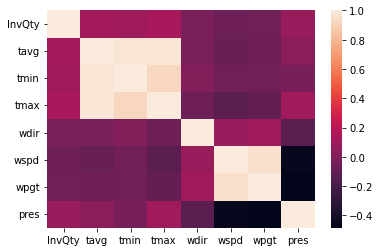

In [61]:
corr=sns.heatmap(df.corr())

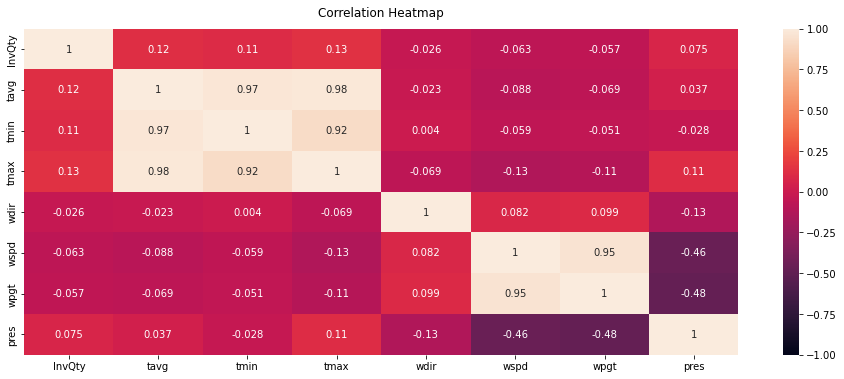

In [63]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [35]:
train_dates = pd.to_datetime(df['InvDate'])
print(train_dates.tail(15)) #Check last few dates. 

1081   2021-12-17
1082   2021-12-18
1083   2021-12-19
1084   2021-12-20
1085   2021-12-21
1086   2021-12-22
1087   2021-12-23
1088   2021-12-24
1089   2021-12-25
1090   2021-12-26
1091   2021-12-27
1092   2021-12-28
1093   2021-12-29
1094   2021-12-30
1095   2021-12-31
Name: InvDate, dtype: datetime64[ns]


In [36]:
df.isnull().sum()

InvDate    0
InvQty     0
tavg       1
tmin       3
tmax       3
wdir       3
wspd       3
wpgt       3
pres       3
dtype: int64

In [37]:
df=df.fillna(df.mean())

C:\Users\MOHAN-~1\AppData\Local\Temp/ipykernel_20192/3358723971.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [38]:
#Variables for training
cols = list(df)[1:8]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['InvQty', 'tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt']


In [39]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

In [40]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [41]:
trainX = []
trainY = []

In [42]:
n_future = 90   # Number of days we want to look into the future based on the past days.
n_past = 140  # Number of past days we want to use to predict the future.


In [43]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (867, 140, 7).
trainY shape == (867, 1).


In [44]:

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [45]:

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 140, 64)           18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [46]:
# fit the model
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/30
49/49 [==============================] - 6s 65ms/step - loss: 1.0485 - val_loss: 0.9176
Epoch 2/30
49/49 [==============================] - 3s 56ms/step - loss: 1.0220 - val_loss: 0.7962
Epoch 3/30
49/49 [==============================] - 3s 56ms/step - loss: 0.9839 - val_loss: 0.7761
Epoch 4/30
49/49 [==============================] - 3s 56ms/step - loss: 0.9423 - val_loss: 0.6408
Epoch 5/30
49/49 [==============================] - 3s 58ms/step - loss: 0.7873 - val_loss: 0.6974
Epoch 6/30
49/49 [==============================] - 3s 71ms/step - loss: 0.6634 - val_loss: 0.5186
Epoch 7/30
49/49 [==============================] - 4s 72ms/step - loss: 0.5802 - val_loss: 0.6822
Epoch 8/30
49/49 [==============================] - 4s 90ms/step - loss: 0.4999 - val_loss: 0.5723
Epoch 9/30
49/49 [==============================] - 4s 82ms/step - loss: 0.4621 - val_loss: 0.4335
Epoch 10/30
49/49 [==============================] - 5s 101ms/step - loss: 0.4200 - val_loss: 0.4356
Epoch 11

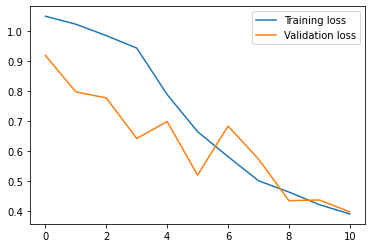

In [47]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [48]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 160
n_days_for_prediction=150  #let us predict past 15 days

In [49]:

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


[Timestamp('2021-07-26 00:00:00', freq='C'), Timestamp('2021-07-27 00:00:00', freq='C'), Timestamp('2021-07-28 00:00:00', freq='C'), Timestamp('2021-07-29 00:00:00', freq='C'), Timestamp('2021-07-30 00:00:00', freq='C'), Timestamp('2021-08-02 00:00:00', freq='C'), Timestamp('2021-08-03 00:00:00', freq='C'), Timestamp('2021-08-04 00:00:00', freq='C'), Timestamp('2021-08-05 00:00:00', freq='C'), Timestamp('2021-08-06 00:00:00', freq='C'), Timestamp('2021-08-09 00:00:00', freq='C'), Timestamp('2021-08-10 00:00:00', freq='C'), Timestamp('2021-08-11 00:00:00', freq='C'), Timestamp('2021-08-12 00:00:00', freq='C'), Timestamp('2021-08-13 00:00:00', freq='C'), Timestamp('2021-08-16 00:00:00', freq='C'), Timestamp('2021-08-17 00:00:00', freq='C'), Timestamp('2021-08-18 00:00:00', freq='C'), Timestamp('2021-08-19 00:00:00', freq='C'), Timestamp('2021-08-20 00:00:00', freq='C'), Timestamp('2021-08-23 00:00:00', freq='C'), Timestamp('2021-08-24 00:00:00', freq='C'), Timestamp('2021-08-25 00:00:00'

In [50]:
df.head()

,InvDate,InvQty,tavg,tmin,tmax,wdir,wspd,wpgt,pres
0,2019-01-01,0.0,6.3,4.4,8.2,307.0,20.1,37.0,1033.9
1,2019-01-02,166838.0,3.9,3.0,5.2,336.0,14.1,31.5,1041.9
2,2019-01-03,177934.0,2.4,0.1,4.2,309.0,10.0,20.4,1042.8
3,2019-01-04,241314.0,1.1,-1.5,3.6,283.0,12.6,25.9,1040.5
4,2019-01-05,70676.0,2.5,1.1,4.3,295.0,14.3,29.6,1037.2


C:\Users\MOHAN-~1\AppData\Local\Temp/ipykernel_20192/1648104090.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['InvDate']=pd.to_datetime(original['InvDate'])
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<AxesSubplot:xlabel='InvDate', ylabel='InvQty'>

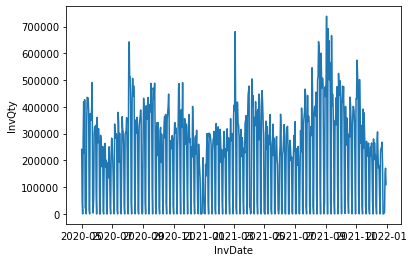

In [51]:

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'InvDate':np.array(forecast_dates), 'InvQty':y_pred_future})
df_forecast['InvDate']=pd.to_datetime(df_forecast['InvDate'])


original = df[['InvDate', 'InvQty']]
original['InvDate']=pd.to_datetime(original['InvDate'])
original = original.loc[original['InvDate'] >= '2020-5-1']

sns.lineplot(original['InvDate'], original['InvQty'])
sns.lineplot(df_forecast['InvDate'], df_forecast['InvQty'])

In [27]:
df_forecast.head()

,InvDate,InvQty
0,2021-07-26,NaN
1,2021-07-27,NaN
2,2021-07-28,NaN
3,2021-07-29,NaN
4,2021-07-30,NaN


In [28]:
df_forecast.tail()

,InvDate,InvQty
145,2022-02-24,NaN
146,2022-02-25,NaN
147,2022-02-28,NaN
148,2022-03-01,NaN
149,2022-03-02,NaN


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InvDate'>

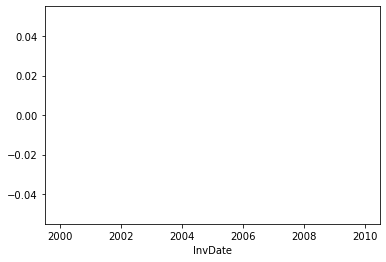

In [29]:
sns.lineplot(df_forecast['InvDate'], df_forecast['InvQty'])